In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


conn = connectDB("Dataset")
cur = conn.cursor()

try:
    #query data using pyscopg2
    #sql = f"select * from public.\"studentInfoSTG\" LIMIT 50"
    #print(sql)
    #cur.execute(sql)
    #rows = cur.fetchall()
    # close communication with the PostgreSQL database server
    #cur.close()
    # commit the changes
except (Exception) as error:
    print(error)
    cur.execute("rollback")

In [3]:
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"analysisDataset\" ", con=conn).reset_index()
df.head()  

,index,id_student,code_module,code_presentation,module_domain,module_presentation_length,term,year,num_of_prev_attempts,b4_sum_clicks,...,reg_period,date_registration,date_unregistration,disability,gender,age_band,region,highest_education,imd_band,studied_credits
0,0,6516,AAA,2014J,SocialScience,269,J,2014,0,256,...,QUARTERB4,-52.0,NaN,N,M,55<=,Scotland,HE Qualification,80-90%,60
1,1,23629,BBB,2013B,SocialScience,240,B,2013,2,14,...,QUARTERB4,-47.0,NaN,N,F,0-35,East Anglian Region,Lower Than A Level,20-30%,60
2,2,23798,BBB,2013J,SocialScience,268,J,2013,0,6,...,MONTHB4,-27.0,NaN,N,M,0-35,Wales,A Level or Equivalent,50-60%,60
3,3,24213,DDD,2014B,STEM,241,B,2014,1,3,...,QUARTERB4,-54.0,NaN,N,F,0-35,East Anglian Region,A Level or Equivalent,40-50%,60
4,4,24391,GGG,2013J,SocialScience,261,J,2013,0,0,...,QUARTERB4,-64.0,NaN,N,M,0-35,East Midlands Region,A Level or Equivalent,80-90%,30


In [4]:
df.dtypes

index                           int64
id_student                      int64
code_module                    object
code_presentation              object
module_domain                  object
module_presentation_length      int64
term                           object
year                           object
num_of_prev_attempts            int64
b4_sum_clicks                   int64
q1_sum_clicks                   int64
q2_sum_clicks                   int64
q3_sum_clicks                   int64
q4_sum_clicks                   int64
cma_assmt_score               float64
tma_assmt_score               float64
tma_cma_assmt_score           float64
is_final_exam                 float64
total_weight                  float64
final_result                   object
pass_fail_ind                  object
reg_period                     object
date_registration             float64
date_unregistration           float64
disability                     object
gender                         object
age_band    

Scotland                3253
East Anglian Region     3050
London Region           2895
South Region            2881
North Western Region    2602
West Midlands Region    2305
South West Region       2234
East Midlands Region    2133
Wales                   2014
South East Region       1922
Yorkshire Region        1820
North Region            1683
Ireland                 1128
Name: region, dtype: int64


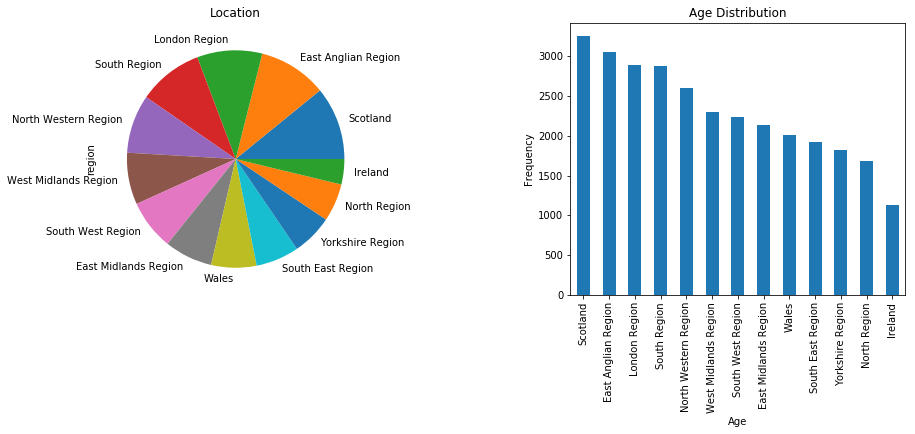

In [5]:
#test still contains duplicates, we need to remove them before running these charts

presentation_counts = df['region'].value_counts()
print (presentation_counts)


# attempt pie chart and histogram pie chart.  Using both visuals to see which is better at displaying the data.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
presentation_counts.plot(kind='pie')
plt.title('Location')

plt.subplot(1,2,2)
presentation_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# add more space between the two plots
plt.subplots_adjust(wspace=0.5)

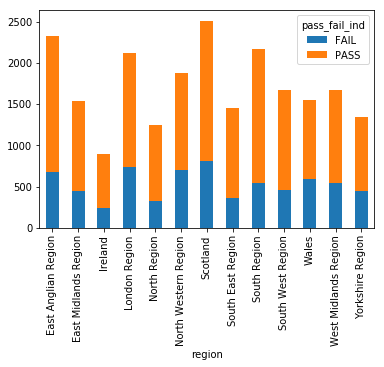

In [6]:
df.groupby(['region','pass_fail_ind']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

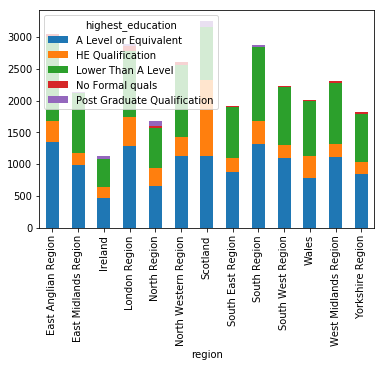

In [7]:
df.groupby(['region','highest_education']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

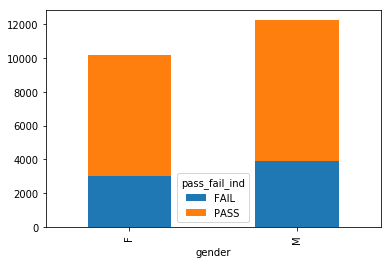

In [8]:
df.groupby(['gender', 'pass_fail_ind']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


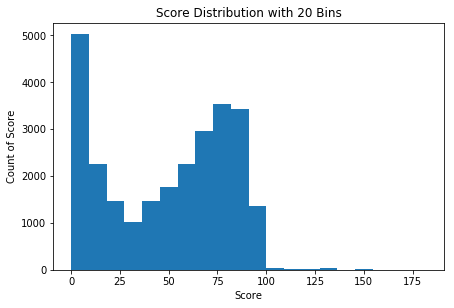

In [9]:
#test still contains duplicates, we need to remove them before running these charts

#we're going to need to create bins for these scores

#grade_counts = df["tma_cma_assmt_score"].value_counts()



# attempts pie chart and histogram pie chart.  Using both visuals to see which is better at displaying the data.

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['tma_cma_assmt_score'], bins=20, range=(df['tma_cma_assmt_score'].min(),df['tma_cma_assmt_score'].max()))
plt.title('Score Distribution with 20 Bins')
plt.xlabel('Score')
plt.ylabel('Count of Score')
plt.show()

In [10]:
# extract everything from 'table_name' into a dataframe
df2 = pd_sql.read_sql(f"select * from public.\"studentAssessmentFULLSTG\" ", con=conn).reset_index()
df2.head()  

,index,id_assessment,id_student,date_submitted,is_banked,scoretxt,score,code_module,code_presentation,assessment_type,final_sub_date,weight
0,0,1759,6516,51,0,48,48.0,AAA,2014J,TMA,54.0,20.0
1,1,1760,6516,116,0,63,63.0,AAA,2014J,TMA,117.0,20.0
2,2,1758,6516,17,0,60,60.0,AAA,2014J,TMA,19.0,10.0
3,3,1761,6516,164,0,61,61.0,AAA,2014J,TMA,166.0,20.0
4,4,1762,6516,210,0,77,77.0,AAA,2014J,TMA,215.0,30.0


In [11]:
df2['id_student'].count()

173912

In [12]:
df2['id_student'].nunique()

23369

In [13]:
#count of null values
df.isnull().sum()

index                             0
id_student                        0
code_module                       0
code_presentation                 0
module_domain                     0
module_presentation_length        0
term                              0
year                              0
num_of_prev_attempts              0
b4_sum_clicks                     0
q1_sum_clicks                     0
q2_sum_clicks                     0
q3_sum_clicks                     0
q4_sum_clicks                     0
cma_assmt_score                3243
tma_assmt_score                3270
tma_cma_assmt_score            3270
is_final_exam                  3243
total_weight                   3243
final_result                      0
pass_fail_ind                  7526
reg_period                       80
date_registration                 8
date_unregistration           22459
disability                        0
gender                            0
age_band                          0
region                      

In [14]:
#distribution of gender based on course genre
df.groupby(['code_presentation']).count()

,index,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,b4_sum_clicks,q1_sum_clicks,...,reg_period,date_registration,date_unregistration,disability,gender,age_band,region,highest_education,imd_band,studied_credits
code_presentation,,,,,,,,,,,,,,,,,,,,,
2013B,4364,4364,4364,4364,4364,4364,4364,4364,4364,4364,...,4364,4364,1055,4364,4364,4364,4364,4364,4364,4364
2013J,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149,...,8120,8145,1731,8149,8149,8149,8149,8149,8149,8149
2014B,7013,7013,7013,7013,7013,7013,7013,7013,7013,7013,...,7010,7010,1889,7013,7013,7013,7013,7013,7013,7013
2014J,10394,10394,10394,10394,10394,10394,10394,10394,10394,10394,...,10346,10393,2786,10394,10394,10394,10394,10394,10394,10394


In [15]:
#distribution of gender based on course genre
df.groupby(['code_module']).count()

,index,id_student,code_presentation,module_domain,module_presentation_length,term,year,num_of_prev_attempts,b4_sum_clicks,q1_sum_clicks,...,reg_period,date_registration,date_unregistration,disability,gender,age_band,region,highest_education,imd_band,studied_credits
code_module,,,,,,,,,,,,,,,,,,,,,
AAA,755,755,755,755,755,755,755,755,755,755,...,753,755,122,755,755,755,755,755,755,755
BBB,6736,6736,6736,6736,6736,6736,6736,6736,6736,6736,...,6721,6736,1295,6736,6736,6736,6736,6736,6736,6736
CCC,4095,4095,4095,4095,4095,4095,4095,4095,4095,4095,...,4089,4094,1609,4095,4095,4095,4095,4095,4095,4095
DDD,5978,5978,5978,5978,5978,5978,5978,5978,5978,5978,...,5950,5975,1875,5978,5978,5978,5978,5978,5978,5978
EEE,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,...,2700,2705,514,2707,2707,2707,2707,2707,2707,2707
FFF,7283,7283,7283,7283,7283,7283,7283,7283,7283,7283,...,7263,7281,1844,7283,7283,7283,7283,7283,7283,7283
GGG,2366,2366,2366,2366,2366,2366,2366,2366,2366,2366,...,2364,2366,202,2366,2366,2366,2366,2366,2366,2366


In [16]:
df.head()

,index,id_student,code_module,code_presentation,module_domain,module_presentation_length,term,year,num_of_prev_attempts,b4_sum_clicks,...,reg_period,date_registration,date_unregistration,disability,gender,age_band,region,highest_education,imd_band,studied_credits
0,0,6516,AAA,2014J,SocialScience,269,J,2014,0,256,...,QUARTERB4,-52.0,NaN,N,M,55<=,Scotland,HE Qualification,80-90%,60
1,1,23629,BBB,2013B,SocialScience,240,B,2013,2,14,...,QUARTERB4,-47.0,NaN,N,F,0-35,East Anglian Region,Lower Than A Level,20-30%,60
2,2,23798,BBB,2013J,SocialScience,268,J,2013,0,6,...,MONTHB4,-27.0,NaN,N,M,0-35,Wales,A Level or Equivalent,50-60%,60
3,3,24213,DDD,2014B,STEM,241,B,2014,1,3,...,QUARTERB4,-54.0,NaN,N,F,0-35,East Anglian Region,A Level or Equivalent,40-50%,60
4,4,24391,GGG,2013J,SocialScience,261,J,2013,0,0,...,QUARTERB4,-64.0,NaN,N,M,0-35,East Midlands Region,A Level or Equivalent,80-90%,30


In [20]:
df.groupby(['gender', 'module_domain']).count()

index  id_student  code_module  code_presentation  \
gender module_domain                                                      
F      STEM            5012        5012         5012               5012   
       SocialScience   8205        8205         8205               8205   
M      STEM           15051       15051        15051              15051   
       SocialScience   1652        1652         1652               1652   

                      module_presentation_length   term   year  \
gender module_domain                                             
F      STEM                                 5012   5012   5012   
       SocialScience                        8205   8205   8205   
M      STEM                                15051  15051  15051   
       SocialScience                        1652   1652   1652   

                      num_of_prev_attempts  b4_sum_clicks  q1_sum_clicks  ...  \
gender module_domain                                                      ...   
F      STEM                           5012           5012           5012  ...   
       SocialScience                  8205           8205           8205  ...   
M      STEM                          15051          15051          15051  ...   
       SocialScience                  1652           1652           1652  ...   

                      pass_fail_ind  reg_period  date_registration  \
gender module_domain                                                 
F      STEM                    3351        4994               5010   
       SocialScience           6819        8188               8205   
M      STEM                   10813       15008              15045   
       SocialScience           1411        1650               1652   

                      date_unregistration  disability  age_band  region  \
gender module_domain                                                      
F      STEM                          1643        5012      5012    5012   
       SocialScience                 1379        8205      8205    8205   
M      STEM                          4199       15051     15051   15051   
       SocialScience                  240        1652      1652    1652   

                      highest_education  imd_band  studied_credits  
gender module_domain                                                
F      STEM                        5012      5012             5012  
       SocialScience               8205      8205             8205  
M      STEM                       15051     15051            15051  
       SocialScience               1652      1652             1652  

[4 rows x 29 columns]

In [19]:
disconnectDB()

NameError: name 'cur' is not defined